<a href="https://colab.research.google.com/github/foyezfar/ML/blob/main/Multiclass_image_classification_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import zipfile
import os
import shutil
import glob

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
Zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Bird_data.zip","r")
Zip_ref.extractall("/tmp")
Zip_ref.close()

In [4]:
base_dir ="/tmp/train"

In [5]:
import os
print(os.listdir("/tmp/train"))

['INDIGO BUNTING', 'EURASIAN MAGPIE', 'EGYPTIAN GOOSE', 'RED FODY', 'MYNA', 'CROW', 'SAND MARTIN', 'EMU', 'OSTRICH', 'TAILORBIRD', 'CRANE HAWK', 'PEACOCK', 'WOOD DUCK', 'GOLDEN PIPIT', 'FAIRY PENGUIN', 'WILD TURKEY', 'ROBIN', 'BARN OWL', 'HARPY EAGLE', 'COCKATOO']


In [6]:
import numpy as np
import cv2
import random as rn
from tqdm import tqdm
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras.layers import Dense


In [7]:
IMAGE_SIZE=224
BATCH_SIZE=32

#pre=processing
train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1
    )

test_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
     rescale=1./255,
     validation_split=0.1
)

train_datagen=train_datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='training'
)

test_datagen=test_datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='validation'
)

Found 2862 images belonging to 20 classes.
Found 309 images belonging to 20 classes.


In [8]:
cnn=tf.keras.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=64,padding='same',strides=2,kernel_size=3,activation='relu',input_shape=(224,224,3)))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',strides=2,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',strides=2,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(20,activation='softmax'))

In [9]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 112, 112, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 56, 56, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 32)          9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 32)         0

In [10]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(),loss='categorical_crossentropy',metrics=['accuracy'])

In [11]:
history = cnn.fit(train_datagen,epochs=100,validation_data=test_datagen)

Epoch 1/100
90/90 [==============================] - 39s 342ms/step - loss: 2.8630 - accuracy: 0.1240 - val_loss: 2.4343 - val_accuracy: 0.2718
Epoch 2/100
90/90 [==============================] - 31s 350ms/step - loss: 2.0875 - accuracy: 0.3599 - val_loss: 1.9402 - val_accuracy: 0.3981
Epoch 3/100
90/90 [==============================] - 30s 335ms/step - loss: 1.7399 - accuracy: 0.4700 - val_loss: 1.7222 - val_accuracy: 0.4531
Epoch 4/100
90/90 [==============================] - 30s 334ms/step - loss: 1.5299 - accuracy: 0.5349 - val_loss: 1.5131 - val_accuracy: 0.5405
Epoch 5/100
90/90 [==============================] - 30s 336ms/step - loss: 1.3913 - accuracy: 0.5825 - val_loss: 1.3897 - val_accuracy: 0.5728
Epoch 6/100
90/90 [==============================] - 30s 336ms/step - loss: 1.3034 - accuracy: 0.6006 - val_loss: 1.4085 - val_accuracy: 0.5761
Epoch 7/100
90/90 [==============================] - 30s 339ms/step - loss: 1.2238 - accuracy: 0.6272 - val_loss: 1.2435 - val_accuracy:

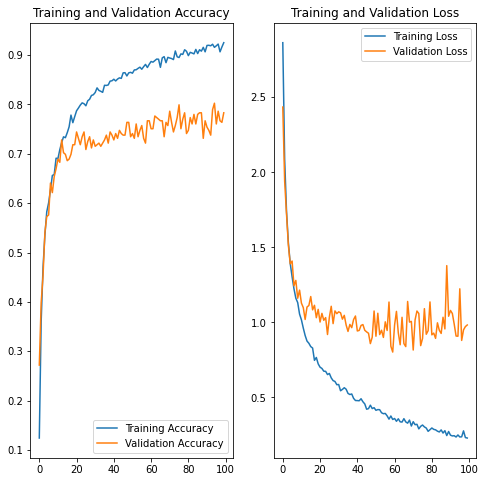

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(100)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [13]:
cnn.save('BirdClassification.h5')